In [29]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Import

First we open a file containing a dictionary of columns and associated data types generated in `../../optimize/`, then we read input file.

In [30]:
with open('../input/dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.load(yamlfile)

read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ice-air.csv.gz', **read_csv_opts)

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763020 entries, 0 to 1763019
Data columns (total 44 columns):
Status                  category
Sex                     category
Convictions             category
GangMember              category
ClassLvl                float32
Age                     float32
MissionDate             datetime64[ns]
MissionNumber           uint32
PULOC                   category
DropLoc                 category
StrikeFromList          float32
ReasonStruck            category
R-T                     category
Code                    category
CountryOfCitizenship    category
Juvenile                bool
MissionWeek             uint8
MissionQuarter          uint8
MissionYear             uint16
MissionMonth            uint8
Criminality             category
FamilyUnitFlag          float32
UnaccompaniedFlag       float32
AlienMasterID           uint32
MissionID               uint16
air_AirportID           float32
air_AirportName         category
air_City         

# Juveniles

- [ ] Has the number of minors being repatriated increased over time? For what countries? 
- [ ] How many minors are typically on a flight? 
- [ ] Are there flights with only minors?
- [ ] Increase in deportations of minors to Guatemala?
  - [ ] Instances of more than 20 unaccompanied minors in Guatemala in one day

In [31]:
nationality = 'GUATEMALA'

nationality_df = df[df['CountryOfCitizenship'] == str(nationality).upper()]

In [32]:
groupby = nationality_df.groupby(['CountryOfCitizenship','MissionDate', 'R-T', 'PULOC', 'DropLoc'])

In [33]:
table = groupby['AlienMasterID'].nunique().reset_index(name='AlienMasterIDCount')
table['MissionIDCount'] = groupby['MissionID'].nunique().reset_index(name='MissionIDCount')['MissionIDCount']

repatriations = table[table['R-T'] == 'R'].copy()
transfers = table[table['R-T'] == 'T'].copy()

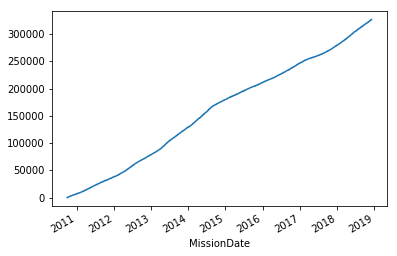

In [34]:
repatriations.set_index('MissionDate', inplace=True)

r_cum = repatriations['AlienMasterIDCount'].cumsum()
t_cum = transfers['AlienMasterIDCount'].cumsum()

r_cum.plot();

In [35]:
juv_table = groupby['Juvenile'].sum().reset_index(name='Juveniles')

In [36]:
juv_repatriations = juv_table[juv_table['R-T'] == 'R'].copy()
juv_transfers = juv_table[juv_table['R-T'] == 'T'].copy()

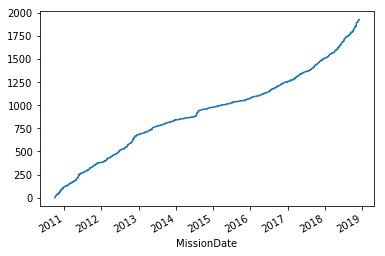

In [37]:
juv_repatriations.set_index('MissionDate', inplace=True)

juv_r_cum = juv_repatriations['Juveniles'].cumsum()

juv_r_cum.plot()

In [38]:
juv_repatriations.head()

,CountryOfCitizenship,R-T,PULOC,DropLoc,Juveniles
MissionDate,,,,,
2010-10-01,GUATEMALA,R,KHRL,MGGT,0.0
2010-10-01,GUATEMALA,R,KIWA,MGGT,0.0
2010-10-01,GUATEMALA,R,KSAT,MGGT,0.0
2010-10-04,GUATEMALA,R,KMIA,MGGT,4.0
2010-10-05,GUATEMALA,R,KELP,MGGT,0.0


In [39]:
repatriations['Juveniles'] = juv_repatriations['Juveniles']

In [41]:
repatriations['Juveniles'].max()

25.0

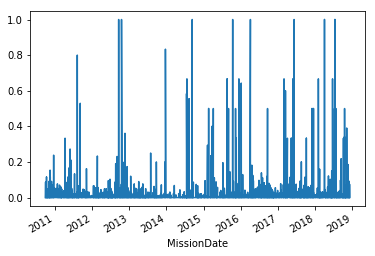

In [12]:
repatriations['JuvPercent'] = juv_repatriations['Juveniles'] / repatriations['AlienMasterIDCount']

repatriations.tail(20)

repatriations['JuvPercent'].plot();

In [13]:
repatriations

,CountryOfCitizenship,R-T,PULOC,DropLoc,AlienMasterIDCount,MissionIDCount,Juveniles,JuvPercent
MissionDate,,,,,,,,
2010-10-01,GUATEMALA,R,KHRL,MGGT,67,1,0.0,0.000000
2010-10-01,GUATEMALA,R,KIWA,MGGT,121,1,0.0,0.000000
2010-10-01,GUATEMALA,R,KSAT,MGGT,37,1,0.0,0.000000
2010-10-04,GUATEMALA,R,KMIA,MGGT,46,1,4.0,0.086957
2010-10-05,GUATEMALA,R,KELP,MGGT,23,1,0.0,0.000000
2010-10-05,GUATEMALA,R,KIWA,MGGT,112,1,0.0,0.000000
2010-10-06,GUATEMALA,R,KDAL,MGGT,14,1,0.0,0.000000
2010-10-06,GUATEMALA,R,KIAH,MGGT,29,1,0.0,0.000000
2010-10-07,GUATEMALA,R,KAEX,MGGT,127,1,0.0,0.000000


# All juveniles

In [42]:
juv_df = df[df['Juvenile'] == True]

In [110]:
df['Juvenile'].value_counts()

False    1736823
True       26197
Name: Juvenile, dtype: int64

In [111]:
sum(df['Juvenile'])

26197

In [112]:
groupby_juv = df.groupby(['CountryOfCitizenship','MissionDate', 'R-T', 'PULOC', 'DropLoc'])

In [113]:
table = groupby_juv['AlienMasterID'].nunique().reset_index(name='AlienMasterIDCount')
table['MissionIDCount'] = groupby_juv['MissionID'].nunique().reset_index(name='MissionIDCount')['MissionIDCount']
table['JuvenileCount'] = groupby_juv['Juvenile'].sum().reset_index(name='JuvenileCount')['JuvenileCount']

repatriations = table[table['R-T'] == 'R'].copy()
transfers = table[table['R-T'] == 'T'].copy()

In [114]:
repatriations.set_index('MissionDate', inplace=True)

In [118]:
sum(repatriations['JuvenileCount'])

3149.0

In [120]:
annual = repatriations[['AlienMasterIDCount', 'JuvenileCount']].resample('AS-OCT').sum()

In [123]:
annual['JuvenilePercent'] = annual['JuvenileCount'] / annual['AlienMasterIDCount'] * 100

In [133]:
annual['JuvenileCount'] = annual['JuvenileCount'].astype(int)
annual['TotalRemovals'] = annual['AlienMasterIDCount']

In [134]:
annual.to_csv('../output/AllJuvenileRemovals.csv')

In [126]:
annual['JuvenilePercent']

MissionDate
2010-10-01    0.473562
2011-10-01    0.163740
2012-10-01    0.136850
2013-10-01    0.197348
2014-10-01    0.201743
2015-10-01    0.251679
2016-10-01    0.283057
2017-10-01    0.305352
2018-10-01    0.542961
Freq: AS-OCT, Name: JuvenilePercent, dtype: float64

In [56]:
repatriations.set_index('MissionDate', inplace=True)
transfers.set_index('MissionDate', inplace=True)

In [57]:
repatriations = repatriations.sort_index()
transfers = transfers.sort_index()

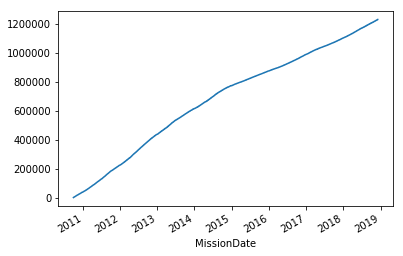

In [58]:
r_cum = repatriations['AlienMasterIDCount'].cumsum()
t_cum = transfers['AlienMasterIDCount'].cumsum()

r_cum.plot();

In [59]:
table

,CountryOfCitizenship,MissionDate,R-T,Juvenile,PULOC,DropLoc,AlienMasterIDCount,MissionIDCount,JuvenileCount,JuvenilePercent
0,ALGERIA,2010-10-14,T,False,KMDT,KHRL,1,1,0.0,0.0
1,ALGERIA,2010-10-15,T,False,KBFL,KIWA,1,1,0.0,0.0
2,ALGERIA,2011-01-31,T,False,KAEX,KMDT,1,1,0.0,0.0
3,ALGERIA,2012-12-18,T,False,KEWR,KAEX,1,1,0.0,0.0
4,ALGERIA,2014-07-14,T,False,KEWR,KAEX,1,1,0.0,0.0
5,ALGERIA,2016-03-22,T,False,KBFI,KIWA,1,1,0.0,0.0
6,ALGERIA,2016-03-24,T,False,KAEX,KMIA,1,1,0.0,0.0
7,ALGERIA,2016-03-24,T,False,KIWA,KAEX,1,1,0.0,0.0
8,ALGERIA,2016-03-31,T,False,KAEX,KIWA,1,1,0.0,0.0
9,ALGERIA,2016-03-31,T,False,KMIA,KAEX,1,1,0.0,0.0
